# Ciencia de Datos 2022

## Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import k_means

from sklearn.datasets import load_iris, make_circles, make_moons, make_blobs
from skimage.data import chelsea, coffee

# K-means

In [2]:
data = load_iris()

In [3]:
X = data['data']
y = data['target']

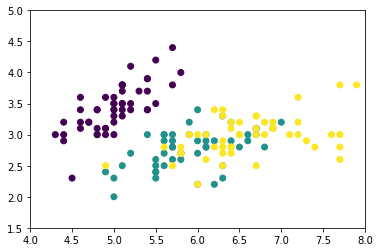

In [4]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [5]:
k = 3
centers, labels, u = k_means(X, n_clusters=k, algorithm='auto', init='random')

In [6]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

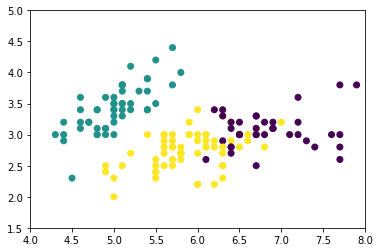

In [7]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

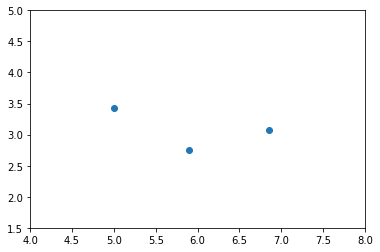

In [8]:
plt.figure()
plt.plot(centers[:,0], centers[:,1], 'o')
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [9]:
labels = ((2 * np.array(labels)) % 3)
print(labels)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
(labels == y).sum() / len(y)

0.32

## Image Quantization

In [11]:
I = plt.imread('horse.jpg')

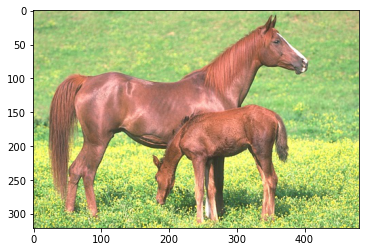

In [12]:
plt.figure()
plt.imshow(I)
plt.show()

In [13]:
sh = I.shape
sh

(321, 481, 3)

In [14]:
I[0,0,:]

array([58, 63, 40], dtype=uint8)

In [15]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [16]:
Iflat.shape

(154401, 3)

In [17]:
Iflat[:10]

array([[ 58,  63,  40],
       [ 55,  64,  33],
       [136, 149, 105],
       [194, 213, 157],
       [184, 209, 144],
       [168, 195, 128],
       [168, 197, 133],
       [156, 184, 123],
       [159, 187, 126],
       [163, 189, 126]], dtype=uint8)

In [22]:
k = 4     # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

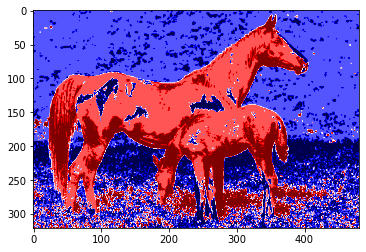

In [23]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='seismic')
plt.show()

In [24]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i]

result = result.reshape(sh).astype(np.uint8)

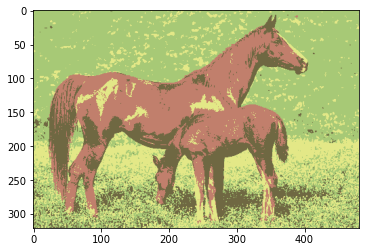

In [25]:
plt.figure()
plt.imshow(result)
plt.show()

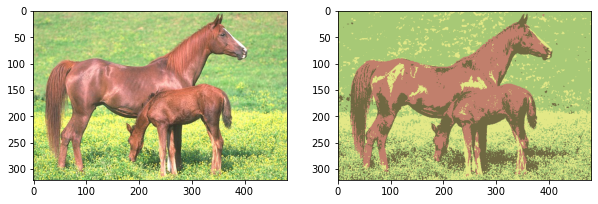

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

## Image Quantization

In [27]:
I = plt.imread('tree.jpg')

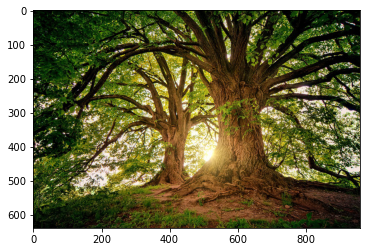

In [28]:
plt.figure()
plt.imshow(I)
plt.show()

In [29]:
sh = I.shape
sh

(639, 960, 3)

In [30]:
I[0,0,:]

array([ 3, 14,  8], dtype=uint8)

In [31]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [32]:
Iflat.shape

(613440, 3)

In [33]:
Iflat[:10]

array([[ 3, 14,  8],
       [ 3, 13,  5],
       [ 7, 15,  2],
       [ 8, 23,  2],
       [ 5, 32,  1],
       [ 3, 41,  2],
       [ 7, 49,  9],
       [20, 54, 21],
       [21, 41, 16],
       [20, 31, 15]], dtype=uint8)

In [39]:
k = 2      # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

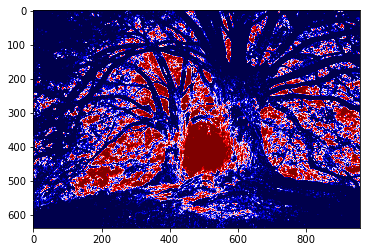

In [40]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='seismic')
plt.show()

In [41]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

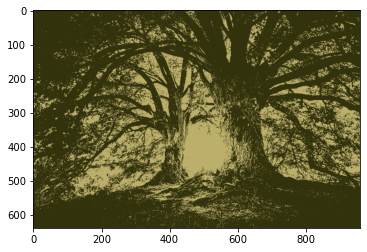

In [42]:
plt.figure()
plt.imshow(result)
plt.show()

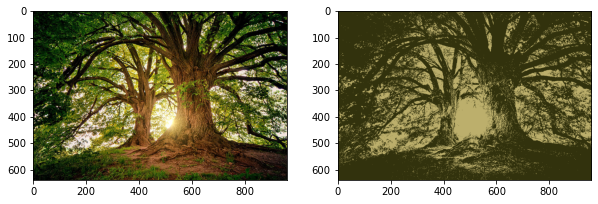

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

### Otro ejemplo

In [33]:
from skimage.data import chelsea

In [34]:
I = chelsea()

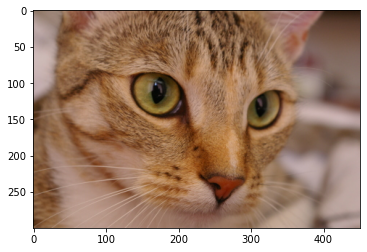

In [35]:
plt.figure()
plt.imshow(I)
plt.show()

In [36]:
sh = I.shape
sh

(300, 451, 3)

In [37]:
Iflat = I.reshape(-1,3)

In [38]:
k = 24
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

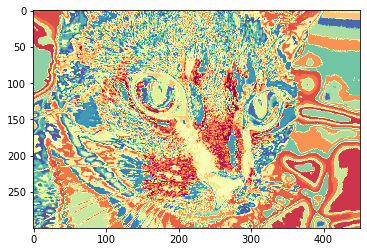

In [39]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='Spectral')
plt.show()

In [40]:
result = np.zeros(sh).reshape(-1,3)

for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

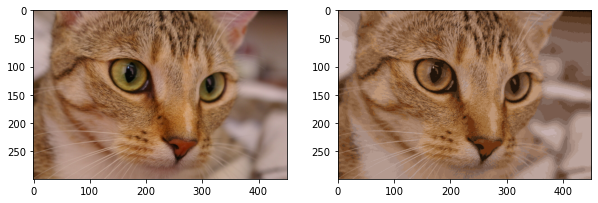

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()